In [1]:
import scipy.optimize as opt
import numpy as np
import pylab as plt

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def oneD_Gaussian(x, amplitude, xo, sigma_x, theta):
    xo = float(xo)
    a = (np.cos(theta)**2)/(2*sigma_x**2)
    g = amplitude*np.exp( - (a*((x-xo)**2)))
    return g.ravel()

In [3]:
def twoD_Gaussian((x, y), amplitude, xo, yo, sigma_x, sigma_y, theta):
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) + c*((y-yo)**2)))
    return g.ravel()

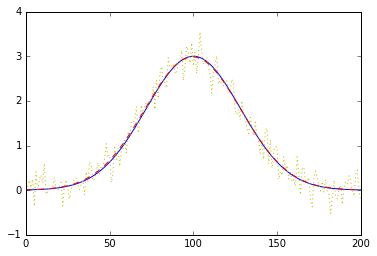

In [4]:
# Create x and y indices
x = np.linspace(0, 200, 201)
y = np.linspace(0, 200, 201)

#create data
data1d = oneD_Gaussian(x, 3, 100, 20, -np.pi/4.)

# add some noise to the data and try to fit the data generated beforehand
# amplitude        = 3 -- the height of the blob
# xo               = 100 -- the center of the blob
# sigma_x          = 20 -- the x and y spread of the blob
# theta            = 0 rad -- the angle of the blob -- rotate the eliptical blob by a clockwise angle
initial_guess = (3,100,20,0)
data_noisy = data1d + 0.2*np.random.normal(size=data1d.shape)
popt, pcov = opt.curve_fit(oneD_Gaussian, x, data_noisy, p0=initial_guess)
data_fitted = oneD_Gaussian(x, *popt)

# plot oneD_Gaussian data generated above
fig = plt.figure()
plt.hold(True)
plt.plot(x, data1d, 'b', x, data_noisy, 'y:', x, data_fitted, 'r--')

plt.show()
